In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df_gas_comp = pd.read_excel("../dataset/Natural gas density data.xlsx", sheet_name="Gas Comp")\
                .fillna(0)\
                .rename(columns={'QNG-S1b': 'QNG1', 'QNG-S2c': 'QNG2', 'QNG-S3d': 'QNG3', 'QNG-S4e': 'QNG4', 'QNG-S5f': 'QNG5'})
df_rho_ng_1 = pd.read_excel("../dataset/Natural gas density data.xlsx", sheet_name="QNG-S1", index_col=0, header=1)
df_rho_ng_2 = pd.read_excel("../dataset/Natural gas density data.xlsx", sheet_name="QNG-S2", index_col=0, header=1)
df_rho_ng_3 = pd.read_excel("../dataset/Natural gas density data.xlsx", sheet_name="QNG-S3", index_col=0, header=1)
df_rho_ng_4 = pd.read_excel("../dataset/Natural gas density data.xlsx", sheet_name="QNG-S4", index_col=0, header=1)
df_rho_ng_5 = pd.read_excel("../dataset/Natural gas density data.xlsx", sheet_name="QNG-S5", index_col=0, header=1)

In [4]:
df_rho_ng_2

,250,260,270,280,290,300,310,320,330,340,...,360,370,380,390,400,410,420,430,440,450
Mpa \ Kelvin,,,,,,,,,,,,,,,,,,,,,
10,NaN,NaN,NaN,NaN,100.57,93.29,87.30,82.25,77.91,74.13,...,67.82,65.14,62.72,60.50,58.47,56.60,54.87,53.26,51.76,50.35
15,236.62,213.50,192.75,174.96,160.06,147.65,137.26,128.48,120.97,114.48,...,103.78,99.31,95.29,91.66,88.35,85.33,82.54,79.97,77.58,75.36
20,274.69,256.23,238.44,221.74,206.43,192.67,180.45,169.65,160.13,151.72,...,137.58,131.60,126.20,121.31,116.85,112.77,109.01,105.54,102.33,99.34
25,298.29,282.81,267.61,252.95,239.01,225.94,213.82,202.69,192.54,183.30,...,167.30,160.36,154.03,148.24,142.92,138.02,133.49,129.30,125.40,121.77
30,315.28,301.77,288.39,275.33,262.73,250.70,239.30,228.57,218.54,209.21,...,192.55,185.15,178.31,171.98,166.12,160.67,155.61,150.88,146.47,142.34
35,328.58,316.45,304.40,292.56,281.05,269.95,259.30,249.15,239.53,230.43,...,213.84,206.31,199.27,192.68,186.51,180.74,175.34,170.26,165.50,161.02
40,339.55,328.45,317.40,306.51,295.87,285.55,275.58,266.00,256.83,248.09,...,231.88,224.41,217.35,210.69,204.40,198.47,192.87,187.59,182.60,177.89
45,348.92,338.62,328.35,318.22,308.29,298.61,289.22,280.15,271.42,263.04,...,247.35,240.03,233.07,226.44,220.14,214.16,208.49,203.10,197.98,193.12
50,357.11,347.45,337.83,328.31,318.97,309.83,300.94,292.32,283.99,275.95,...,260.79,253.66,246.84,240.31,234.08,228.12,222.44,217.01,211.83,206.90


In [5]:
df_gas_comp

,Component,QNG1,QNG2,QNG3,QNG4,QNG5
0,Methane,0.84990,0.90260,0.80340,0.84700,0.85094
1,Ethane,0.05529,0.05828,0.05189,0.05584,0.05529
2,Propane,0.02008,0.02106,0.01878,0.01962,0.02009
3,2-methylpropane,0.00401,0.00412,0.00384,0.00416,0.00401
4,Butane,0.00585,0.00641,0.00573,0.00553,0.00612
5,2-metylbutane,0.00169,0.00214,0.00188,0.00214,0.00171
6,Pentane,0.00147,0.00162,0.00140,0.00155,0.00141
7,Octane,0.00152,0.00161,0.00145,0.00150,0.00152
8,Toluene,0.00090,0.00110,0.00092,0.00098,0.00000
9,Methylcyclopentane,0.00102,0.00111,0.00092,0.00000,0.00099


### Data melt and join

In [7]:
dfs = [df_rho_ng_1, df_rho_ng_2, df_rho_ng_3, df_rho_ng_4, df_rho_ng_5]
processed_dfs = [] # prepare list for all melted dfs

# iterate to all df_rho_ng (1-5)
for i, df in enumerate(dfs, start=1):
  # pandas df melt
  melted_df = df\
                .reset_index()\
                .melt(id_vars='Mpa \ Kelvin', var_name='Temperature', value_name='Density')\
                .assign(NG_TYPE=i)
  
  # map df_gas_comp data to the melted df
  for index, row in df_gas_comp.iterrows():
    melted_df[row['Component']] = row[f'QNG{i}']
  
  # append the melted df to processed df list
  processed_dfs.append(melted_df)

# join the all the modified melted dfs
grand_df = pd.concat(processed_dfs, axis=0)\
            .dropna(subset=['Density'])\
            .rename(columns={'Mpa \ Kelvin': 'Pressure'})\
            .reset_index(drop=True)

# convert Temperature col to int64 datatype
grand_df['Temperature'] = grand_df['Temperature'].astype('int64')

grand_df

,Pressure,Temperature,Density,NG_TYPE,Methane,Ethane,Propane,2-methylpropane,Butane,2-metylbutane,Pentane,Octane,Toluene,Methylcyclopentane,Nitrogen,Carbon Dioxide
0,15,250,243.81,1,0.84990,0.05529,0.02008,0.00401,0.00585,0.00169,0.00147,0.00152,0.0009,0.00102,0.03496,0.02331
1,20,250,285.62,1,0.84990,0.05529,0.02008,0.00401,0.00585,0.00169,0.00147,0.00152,0.0009,0.00102,0.03496,0.02331
2,25,250,311.50,1,0.84990,0.05529,0.02008,0.00401,0.00585,0.00169,0.00147,0.00152,0.0009,0.00102,0.03496,0.02331
3,30,250,330.07,1,0.84990,0.05529,0.02008,0.00401,0.00585,0.00169,0.00147,0.00152,0.0009,0.00102,0.03496,0.02331
4,35,250,344.55,1,0.84990,0.05529,0.02008,0.00401,0.00585,0.00169,0.00147,0.00152,0.0009,0.00102,0.03496,0.02331
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1235,45,450,201.43,5,0.85094,0.05529,0.02009,0.00401,0.00612,0.00171,0.00141,0.00152,0.0000,0.00099,0.03496,0.02296
1236,50,450,215.93,5,0.85094,0.05529,0.02009,0.00401,0.00612,0.00171,0.00141,0.00152,0.0000,0.00099,0.03496,0.02296
1237,55,450,229.11,5,0.85094,0.05529,0.02009,0.00401,0.00612,0.00171,0.00141,0.00152,0.0000,0.00099,0.03496,0.02296
1238,60,450,241.15,5,0.85094,0.05529,0.02009,0.00401,0.00612,0.00171,0.00141,0.00152,0.0000,0.00099,0.03496,0.02296


In [8]:
grand_df.describe()

,Pressure,Temperature,Density,NG_TYPE,Methane,Ethane,Propane,2-methylpropane,Butane,2-metylbutane,Pentane,Octane,Toluene,Methylcyclopentane,Nitrogen,Carbon Dioxide
count,1240.000000,1240.000000,1240.000000,1240.000000,1240.000000,1240.000000,1240.000000,1240.000000,1240.000000,1240.000000,1240.000000,1240.000000,1240.000000,1240.000000,1240.000000,1240.000000
mean,37.943548,351.370968,233.152105,3.000000,0.850768,0.055318,0.019926,0.004028,0.005928,0.001912,0.001490,0.001520,0.000780,0.000808,0.034598,0.022928
std,17.045873,60.069030,86.783661,1.414784,0.031462,0.002040,0.000741,0.000111,0.000308,0.000198,0.000084,0.000052,0.000396,0.000409,0.020923,0.013892
min,10.000000,250.000000,50.350000,1.000000,0.803400,0.051890,0.018780,0.003840,0.005530,0.001690,0.001400,0.001450,0.000000,0.000000,0.000000,0.000000
25%,25.000000,300.000000,170.470000,2.000000,0.847000,0.055290,0.019620,0.004010,0.005730,0.001710,0.001410,0.001500,0.000900,0.000920,0.034960,0.022960
50%,40.000000,350.000000,242.895000,3.000000,0.849900,0.055290,0.020080,0.004010,0.005850,0.001880,0.001470,0.001520,0.000920,0.000990,0.034960,0.023310
75%,55.000000,400.000000,299.025000,4.000000,0.850940,0.055840,0.020090,0.004120,0.006120,0.002140,0.001550,0.001520,0.000980,0.001020,0.037110,0.024570
max,65.000000,450.000000,415.250000,5.000000,0.902600,0.058280,0.021060,0.004160,0.006410,0.002140,0.001620,0.001610,0.001100,0.001110,0.065960,0.043800


In [9]:
grand_df.isna().sum()

Pressure              0
Temperature           0
Density               0
NG_TYPE               0
Methane               0
Ethane                0
Propane               0
2-methylpropane       0
Butane                0
2-metylbutane         0
Pentane               0
Octane                0
Toluene               0
Methylcyclopentane    0
Nitrogen              0
Carbon  Dioxide       0
dtype: int64

In [10]:
grand_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1240 entries, 0 to 1239
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Pressure            1240 non-null   int64  
 1   Temperature         1240 non-null   int64  
 2   Density             1240 non-null   float64
 3   NG_TYPE             1240 non-null   int64  
 4   Methane             1240 non-null   float64
 5   Ethane              1240 non-null   float64
 6   Propane             1240 non-null   float64
 7   2-methylpropane     1240 non-null   float64
 8   Butane              1240 non-null   float64
 9   2-metylbutane       1240 non-null   float64
 10  Pentane             1240 non-null   float64
 11  Octane              1240 non-null   float64
 12  Toluene             1240 non-null   float64
 13  Methylcyclopentane  1240 non-null   float64
 14  Nitrogen            1240 non-null   float64
 15  Carbon  Dioxide     1240 non-null   float64
dtypes: flo

In [11]:
grand_df.corr()

,Pressure,Temperature,Density,NG_TYPE,Methane,Ethane,Propane,2-methylpropane,Butane,2-metylbutane,Pentane,Octane,Toluene,Methylcyclopentane,Nitrogen,Carbon Dioxide
Pressure,1.000000e+00,-3.744461e-02,0.793498,-9.590421e-16,8.231665e-16,8.945910e-16,1.147080e-15,6.509430e-16,4.222243e-16,-6.228736e-16,3.742082e-16,7.747730e-16,2.030935e-17,4.893149e-16,-8.246866e-16,-8.162178e-16
Temperature,-3.744461e-02,1.000000e+00,-0.585708,2.424168e-15,2.348528e-15,-2.809308e-15,-1.696394e-15,7.230272e-15,4.788062e-17,-1.234740e-15,-2.306266e-15,-1.961395e-15,-2.987462e-15,-1.231720e-16,-1.717978e-16,-5.304155e-16
Density,7.934975e-01,-5.857080e-01,1.000000,1.467139e-02,-7.304352e-02,-7.207340e-02,-7.163385e-02,-5.671195e-02,-5.342792e-02,-2.902440e-02,-5.886531e-02,-7.186440e-02,-7.802919e-03,-1.308762e-02,7.300098e-02,7.303079e-02
NG_TYPE,-9.590421e-16,2.424168e-15,0.014671,1.000000e+00,-2.406697e-01,-1.691889e-01,-2.711030e-01,5.084928e-02,-1.563520e-01,2.863872e-02,-3.193390e-01,-3.004971e-01,-6.853647e-01,-4.049728e-01,2.509284e-01,2.430939e-01
Methane,8.231665e-16,2.348528e-15,-0.073044,-2.406697e-01,1.000000e+00,9.789416e-01,9.796482e-01,7.539421e-01,7.436644e-01,4.067073e-01,8.146556e-01,9.896287e-01,1.438697e-01,2.060769e-01,-9.999293e-01,-9.999918e-01
Ethane,8.945910e-16,-2.809308e-15,-0.072073,-1.691889e-01,9.789416e-01,1.000000e+00,9.423938e-01,8.699040e-01,6.044019e-01,4.547087e-01,8.480723e-01,9.397210e-01,1.462322e-01,1.866767e-02,-9.784928e-01,-9.788553e-01
Propane,1.147080e-15,-1.696394e-15,-0.071634,-2.711030e-01,9.796482e-01,9.423938e-01,1.000000e+00,6.641744e-01,8.031148e-01,2.161630e-01,6.931034e-01,9.825947e-01,2.167173e-02,3.461794e-01,-9.788981e-01,-9.791212e-01
2-methylpropane,6.509430e-16,7.230272e-15,-0.056712,5.084928e-02,7.539421e-01,8.699040e-01,6.641744e-01,1.000000e+00,1.577217e-01,5.890565e-01,8.247276e-01,6.528754e-01,1.878649e-01,-4.709012e-01,-7.530322e-01,-7.539966e-01
Butane,4.222243e-16,4.788062e-17,-0.053428,-1.563520e-01,7.436644e-01,6.044019e-01,8.031148e-01,1.577217e-01,1.000000e+00,1.323562e-02,3.308009e-01,8.190676e-01,-1.841781e-01,7.375676e-01,-7.414300e-01,-7.428140e-01
2-metylbutane,-6.228736e-16,-1.234740e-15,-0.029024,2.863872e-02,4.067073e-01,4.547087e-01,2.161630e-01,5.890565e-01,1.323562e-02,1.000000e+00,8.038379e-01,3.559694e-01,6.261526e-01,-5.025262e-01,-4.101789e-01,-4.092252e-01


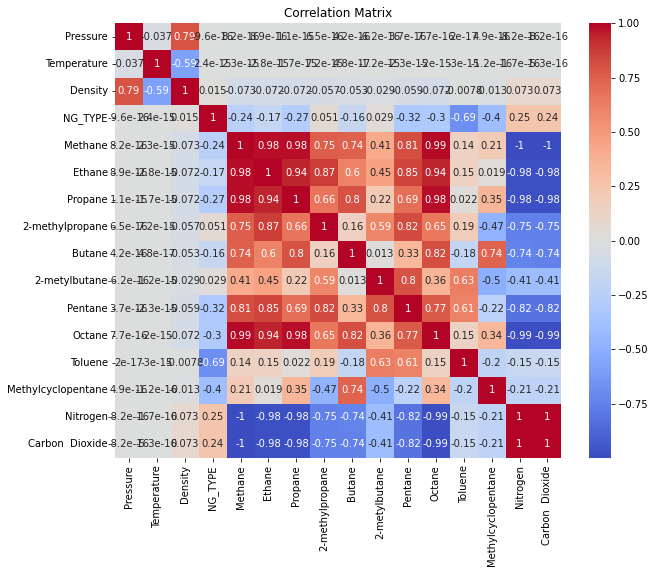

In [12]:
corr_matrix = grand_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

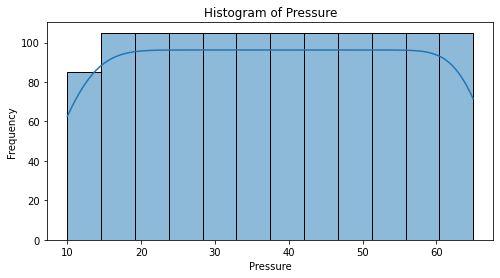

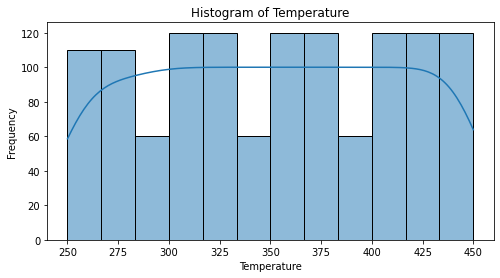

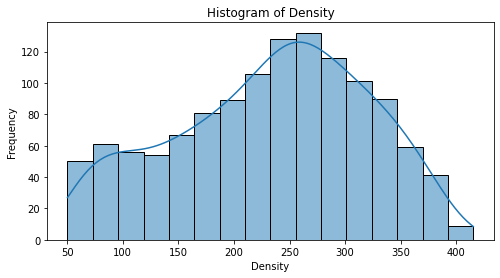

In [22]:
# Plot histograms for each column
for column in grand_df.iloc[:, :3].columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(grand_df[column], kde=True)
    plt.title(f'Histogram of {column}')
    plt.ylabel('Frequency')
    plt.xlabel(column)
    plt.show()

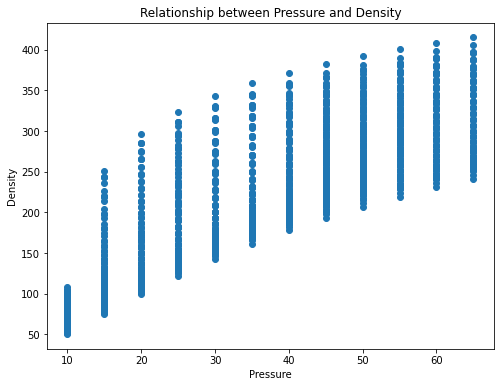

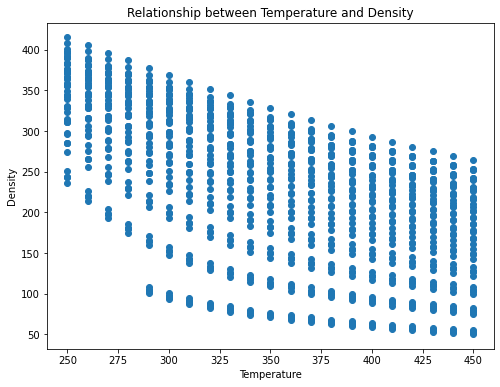

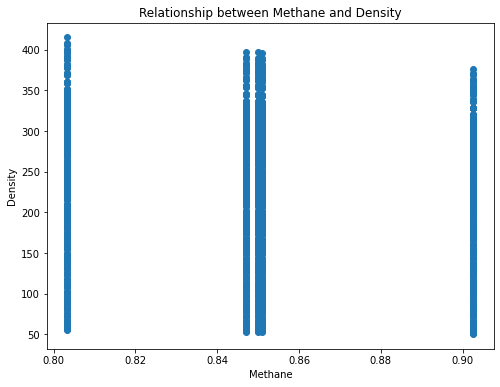

In [14]:
for col in ['Pressure', 'Temperature', 'Methane']:
  plt.figure(figsize=(8, 6))
  plt.scatter(grand_df[col], grand_df['Density'])
  plt.xlabel(col)
  plt.ylabel('Density')
  plt.title(f'Relationship between {col} and Density')
  plt.show()

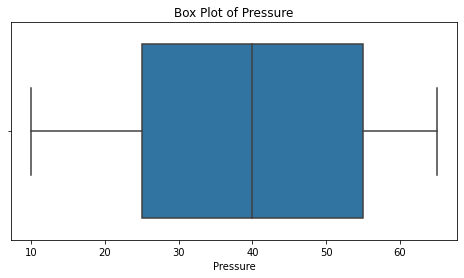

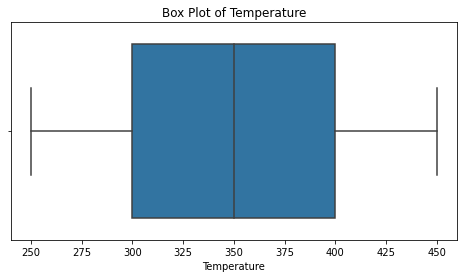

In [20]:
for column in grand_df.iloc[:, :2].columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=grand_df[column])
    plt.title(f'Box Plot of {column}')
    plt.show()

In [15]:
grand_df.to_csv("../dataset/ng_density_all.csv", index=False)